In [1]:
from matplotlib import pyplot as plt
import pandas as pd

import sys, os
sys.path.insert(0, os.path.abspath('../scripts/'))
import footyviz

# Loading Data



In [2]:
data = pd.read_csv('../datasets/positional_data/liverpool_2019.csv', index_col=('play', 'frame'))
data.tail()

bgcolor   dx   dy edgecolor  player  \
play                        frame                                       
Leicester 0 - [3] Liverpool 120      blue  0.0  0.0     white   10267   
                            121      blue  0.0  0.0     white   10267   
                            122      blue  0.0  0.0     white   10267   
                            123      blue  0.0  0.0     white   10267   
                            124      blue  0.0  0.0     white   10267   

                                   player_num     team          x          y  \
play                        frame                                              
Leicester 0 - [3] Liverpool 120           NaN  defense  98.724826  53.720353   
                            121           NaN  defense  98.724826  53.720353   
                            122           NaN  defense  98.724826  53.720353   
                            123           NaN  defense  98.724826  53.720353   
                            124           NaN  defense  98.724826  53.720353   

                                     z  
play                        frame       
Leicester 0 - [3] Liverpool 120    0.0  
                            121    0.0  
                            122    0.0  
                            123    0.0  
                            124    0.0

In [3]:
#list of goals included in the dataset
data.index.get_level_values('play').unique()

Index(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'],
      dtype='object', name='play')

In [4]:
play = 'Liverpool [4] - 0 Barcelona'
df = data.loc[play]
df.tail()

,bgcolor,dx,dy,edgecolor,player,player_num,team,x,y,z
frame,,,,,,,,,,
134,red,0.053492,0.002798,white,24771,NaN,attack,81.482130,56.912439,0.0
135,red,0.047360,0.003669,white,24771,NaN,attack,81.529490,56.916108,0.0
136,red,0.041016,0.004583,white,24771,NaN,attack,81.570506,56.920691,0.0
137,red,0.034459,0.005541,white,24771,NaN,attack,81.604964,56.926231,0.0
138,red,0.027689,0.006542,white,24771,NaN,attack,81.632653,56.932773,0.0


# Basic Plotting

You may have noticed I picked an interesting goal. It was my favorite football moment from 2019: a simple corner taken quickly.

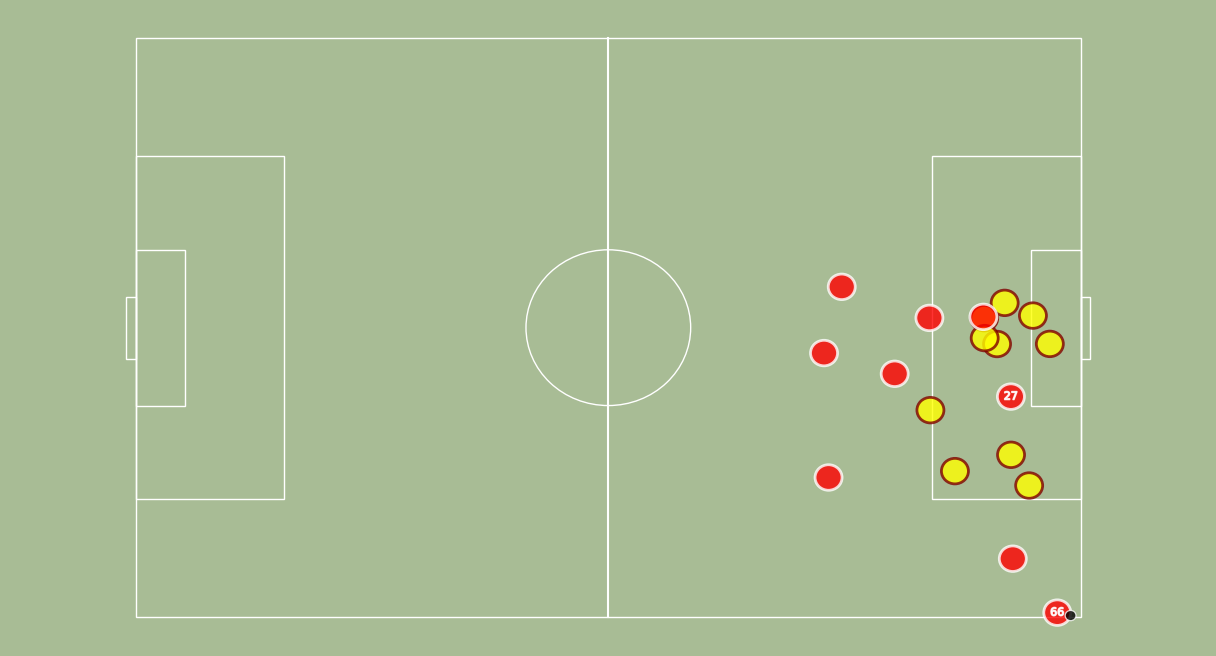

In [5]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=4)

This was probably what was on Trent Alexander-Arnold's head:

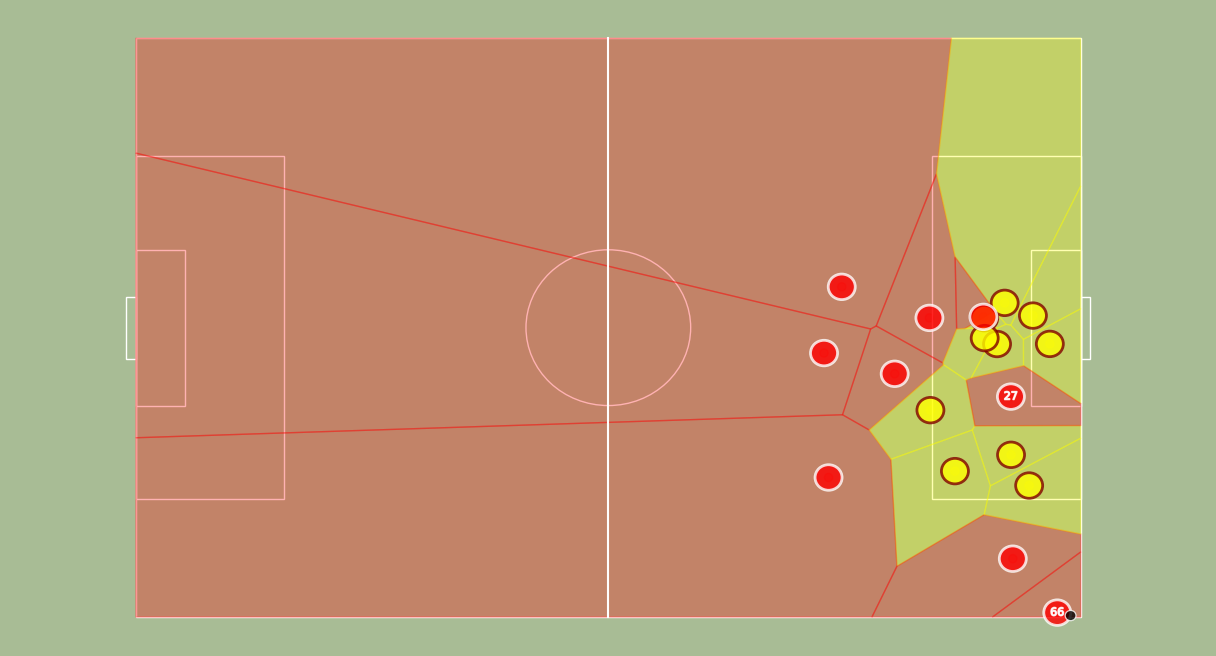

In [6]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=4)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)

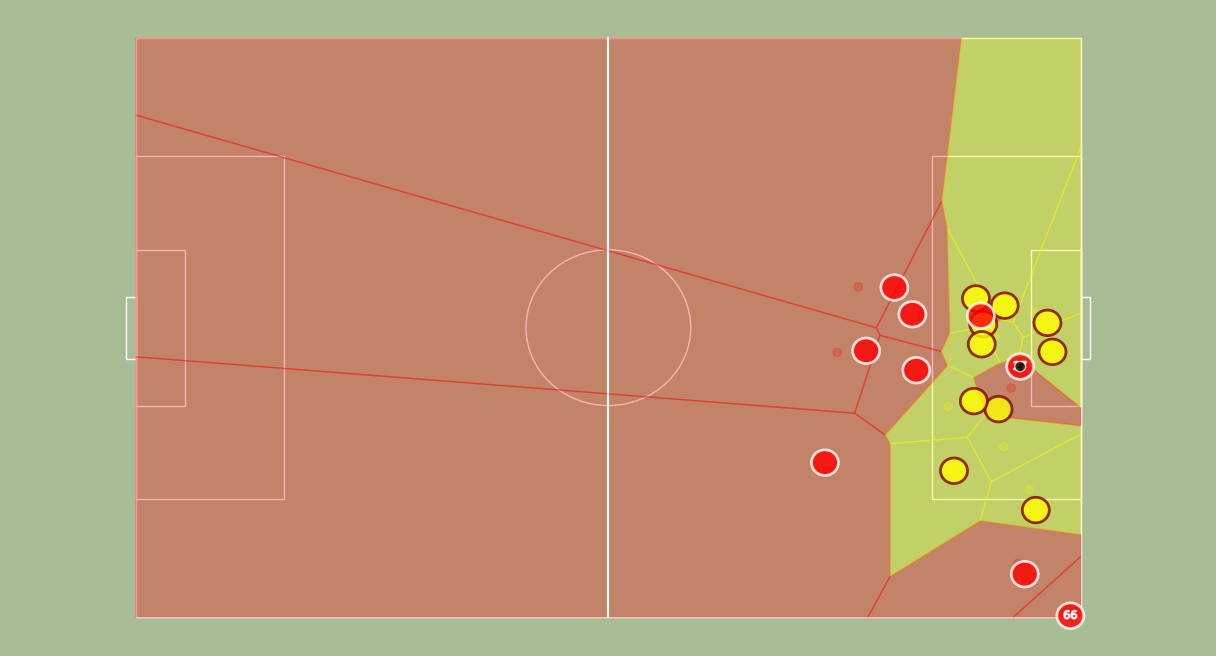

In [7]:
#you can mix different frames for the player's positioning and for the voronoi (e.g. fixing the voronoi to the time of the pass)
fig, ax, dfFrame = footyviz.draw_frame(df, t=6)
dfFrame_for_voronoi = footyviz.get_frame(df, t=4.6)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame_for_voronoi)

# MoviePy

MoviePy is a Python module for video editing that works nicely with matplotlib and Jupyter and is built on top of FFmpeg. You may think you never used FFMpeg, but you have. From Wikipedia:

> FFmpeg is used by software such as VLC media player, xine, Cinelerra-GG video editor, Plex, Kodi, Blender, HandBrake, YouTube, and MPC-HC; it handles video and audio playback in Google Chrome, and Linux version of Firefox. 

You can find MoviePy's documentation at: https://zulko.github.io/moviepy/

Let's start with a basic animation:


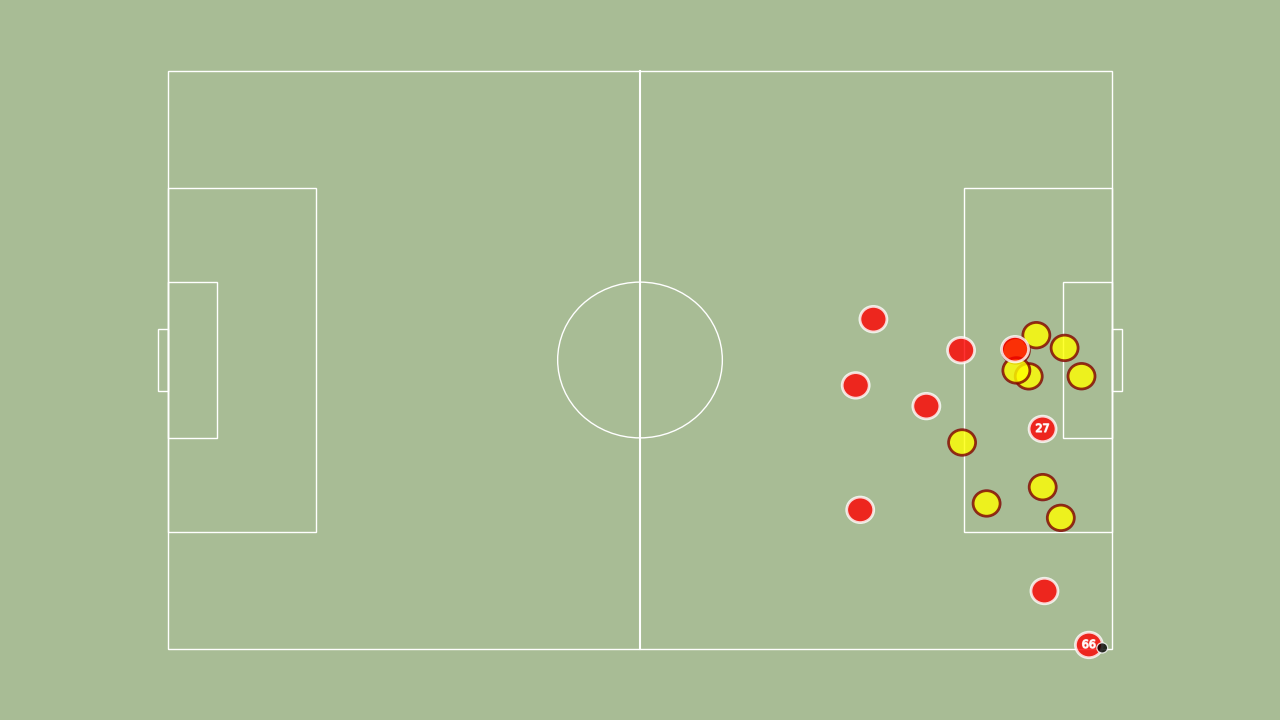

In [8]:
from moviepy import editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

def draw_frame_x(df, t, fps, voronoi=False):
    fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps)
    if voronoi:
        fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
    image = mplfig_to_npimage(fig)
    plt.close()
    return image    

def make_animation(df, fps=20, voronoi=False):
    #calculated variables
    length=(df.index.max()+20)/fps
    clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps, voronoi=voronoi), duration=length-1).set_fps(fps)
    return clip

clip = make_animation(df)

clip.ipython_display(t=4)

This isn't much different from what you can do with Matplotlib's native animate capabilities.

The advantage of having MoviePy in the mix is having easy accsess to editing, compositing and transformation functions. Let's try some examples:


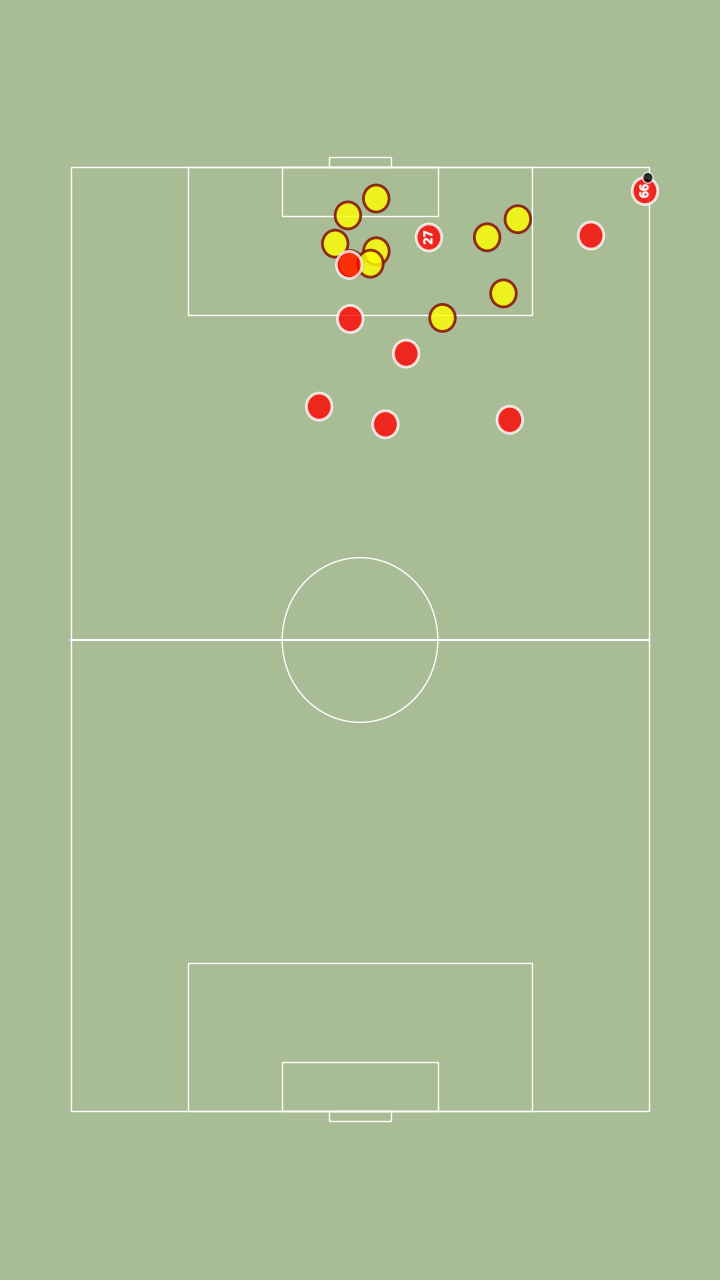

In [9]:
clip.rotate(90).ipython_display(t=4)


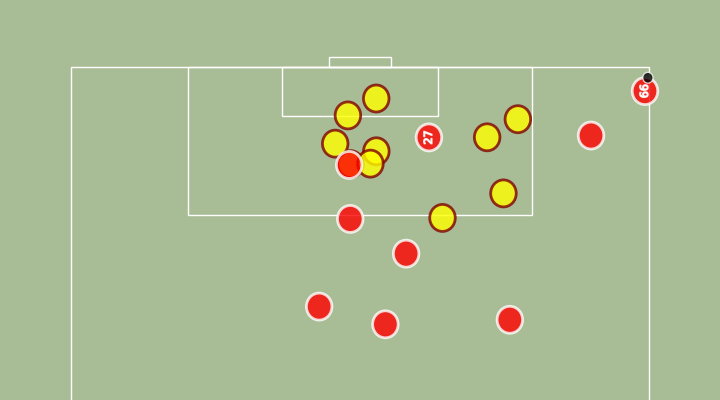

In [10]:
#moviepy allows for method chaining several effects in one line of code:
clip.rotate(90).crop(y1=100, y2=500).ipython_display(t=4)

Linear editing is easy with the ``subclip`` method (for trimming) and ``concatenate_videoclips`` function (to join clips):

normal speed: 173.1 seconds
2x speed: 86.55 seconds



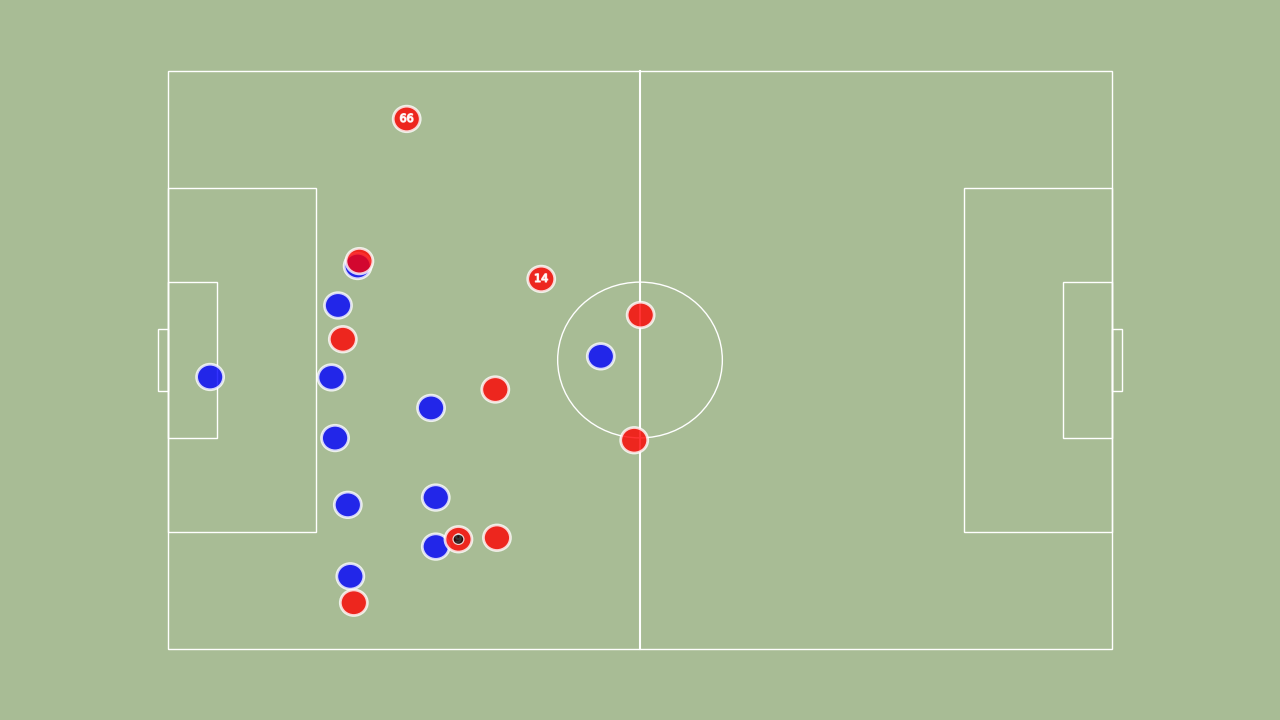

In [13]:
full_clip = mpy.concatenate_videoclips([make_animation(data.loc[play]) for play in data.index.get_level_values('play').unique()])

print('normal speed:', full_clip.duration, 'seconds')
print('2x speed:', full_clip.speedx(2).duration, 'seconds')

full_clip.ipython_display(t=40)

Non-linear editing uses the ``CompositeClip`` object:


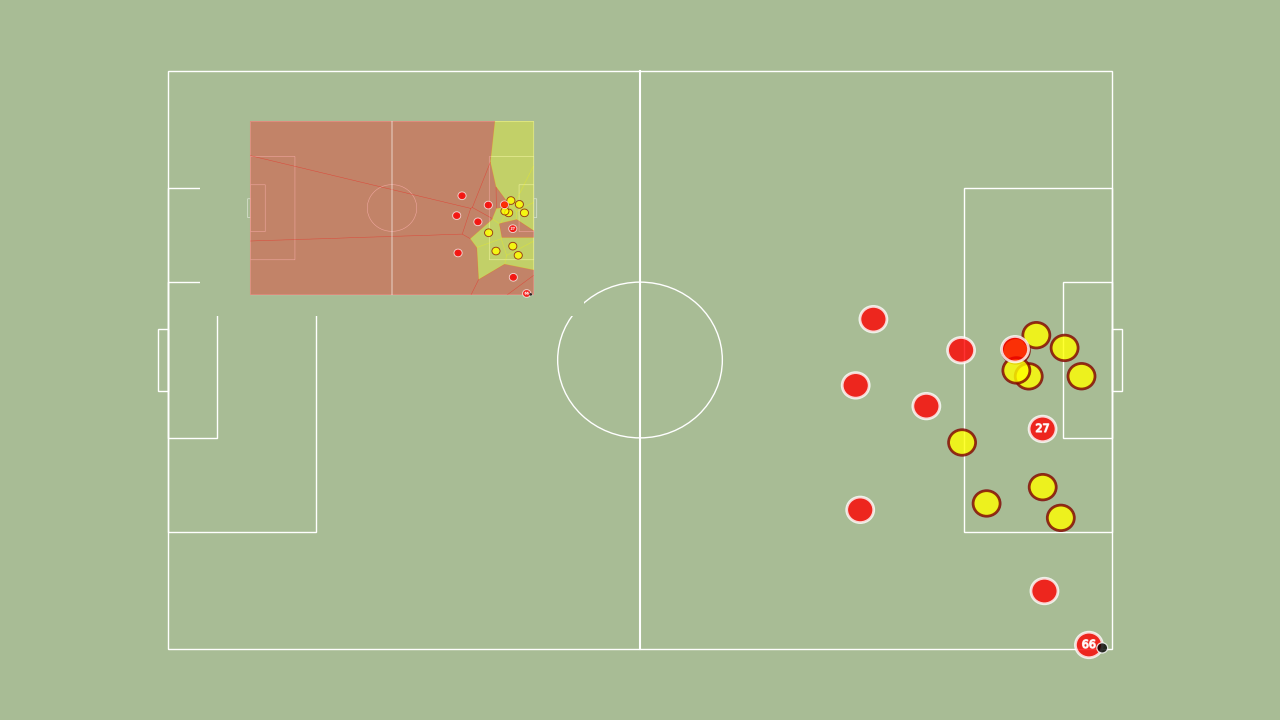

In [12]:
clip_voronoi = make_animation(df, voronoi=True)
composite_clip = mpy.CompositeVideoClip([clip, clip_voronoi.resize(0.3).set_position((200,100))])
composite_clip.ipython_display(t=4)